 ##### To monitor the status of ambient air quality, The Central Pollution Control Board 
#### (CPCB), India, operates a vast network of monitoring stations spread across the country. 
#### Parameters regularly monitored include (OZONE,PM10,SO2,CO)
#### A stepwise analysis of daily air quality data follows to demonstrate how data 
#### analysis could assist in planning interventions as part of air quality management.
### Questions that we want to answer through our analysis:
>1. Yearly averages: Out of the four pollutants - SO2, NO2, ozone, and 
>>PM10 - which have yearly average levels that regularly surpass the 
>>prescribed annual standards?
>2. Daily standards: For the pollutants of concern, on how many days 
> in each year are the daily standards exceeded?
> 3. Temporal variation: Which are the months where the pollution 
>> levels exceed critical levels on most days?

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
aqdata=pd.read_csv('air_pol_delhi.csv')

In [3]:
aqdata.head()

,id,city,site_name,site,state,query_name,to_date,to_time,from_date,from_time,pm25,pm10,SO2,CO,Ozone
0,1,Delhi,"Anand Vihar, Delhi - DPCC",site_301,Delhi,run2_delhi_delhi_site_301_20160101,02-Jan-2016,00:00,01-Jan-2016,00:00,360.81,750.91,33.15,3.13,14.74
1,2,Delhi,"Anand Vihar, Delhi - DPCC",site_301,Delhi,run2_delhi_delhi_site_301_20160103,04-Jan-2016,00:00,03-Jan-2016,00:00,341.32,651.71,22.83,2.57,15.67
2,3,Delhi,"Anand Vihar, Delhi - DPCC",site_301,Delhi,run2_delhi_delhi_site_301_20160105,06-Jan-2016,00:00,05-Jan-2016,00:00,433.35,847.84,38.65,3.58,32.07
3,4,Delhi,"Anand Vihar, Delhi - DPCC",site_301,Delhi,run2_delhi_delhi_site_301_20160107,08-Jan-2016,00:00,07-Jan-2016,00:00,468.02,743.11,34.02,3.39,27.80
4,5,Delhi,"Anand Vihar, Delhi - DPCC",site_301,Delhi,run2_delhi_delhi_site_301_20160109,10-Jan-2016,00:00,09-Jan-2016,00:00,169.49,480.58,16.10,2.20,14.09


In [4]:
aqdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4530 entries, 0 to 4529
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          4530 non-null   int64  
 1   city        4530 non-null   object 
 2   site_name   4530 non-null   object 
 3   site        4530 non-null   object 
 4   state       4530 non-null   object 
 5   query_name  4530 non-null   object 
 6   to_date     4530 non-null   object 
 7   to_time     4530 non-null   object 
 8   from_date   4530 non-null   object 
 9   from_time   4530 non-null   object 
 10  pm25        3159 non-null   float64
 11  pm10        2928 non-null   float64
 12  SO2         1807 non-null   float64
 13  CO          2953 non-null   float64
 14  Ozone       2951 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 531.0+ KB


In [5]:
aqdata.isna().sum()

id               0
city             0
site_name        0
site             0
state            0
query_name       0
to_date          0
to_time          0
from_date        0
from_time        0
pm25          1371
pm10          1602
SO2           2723
CO            1577
Ozone         1579
dtype: int64

In [6]:
aqdata.drop(['id','site_name','site','state','query_name','to_time','from_time','city'],axis=1,inplace=True)

In [7]:
aqdata.head()

,to_date,from_date,pm25,pm10,SO2,CO,Ozone
0,02-Jan-2016,01-Jan-2016,360.81,750.91,33.15,3.13,14.74
1,04-Jan-2016,03-Jan-2016,341.32,651.71,22.83,2.57,15.67
2,06-Jan-2016,05-Jan-2016,433.35,847.84,38.65,3.58,32.07
3,08-Jan-2016,07-Jan-2016,468.02,743.11,34.02,3.39,27.80
4,10-Jan-2016,09-Jan-2016,169.49,480.58,16.10,2.20,14.09


In [8]:
aqdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4530 entries, 0 to 4529
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   to_date    4530 non-null   object 
 1   from_date  4530 non-null   object 
 2   pm25       3159 non-null   float64
 3   pm10       2928 non-null   float64
 4   SO2        1807 non-null   float64
 5   CO         2953 non-null   float64
 6   Ozone      2951 non-null   float64
dtypes: float64(5), object(2)
memory usage: 247.9+ KB


In [9]:
aqdata['to_date']=pd.to_datetime(aqdata['to_date'])

In [10]:
aqdata['from_date']=pd.to_datetime(aqdata['from_date'])

In [11]:
aqdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4530 entries, 0 to 4529
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   to_date    4530 non-null   datetime64[ns]
 1   from_date  4530 non-null   datetime64[ns]
 2   pm25       3159 non-null   float64       
 3   pm10       2928 non-null   float64       
 4   SO2        1807 non-null   float64       
 5   CO         2953 non-null   float64       
 6   Ozone      2951 non-null   float64       
dtypes: datetime64[ns](2), float64(5)
memory usage: 247.9 KB


In [12]:
aqdata['year']=pd.DatetimeIndex(aqdata['from_date']).year

In [13]:
aqgroup=aqdata.groupby('year')
aqgroup.groups.keys()

dict_keys([2016, 2017, 2018, 2019, 2020, 2021])

In [14]:
aq2016=aqgroup.get_group(2016)
aq2017=aqgroup.get_group(2017)
aq2018=aqdata[aqdata['year']==2018]
aq2019=aqdata[aqdata['year']==2019]
aq2020=aqdata[aqdata['year']==2020]
aq2021=aqdata[aqdata['year']==2021]

In [15]:
aq2016.isna().sum().sum()

3624

In [16]:
aq2017.isna().sum().sum()

3336

In [17]:
aq2018.isna().sum().sum()

805

In [18]:
aq2019.isna().sum().sum()

540

In [19]:
aq2020.isna().sum().sum()

528

In [20]:
aq2021.isna().sum().sum()

19

## From the analysis of null values for each year we see
> ### that data for the years 2016 , 2017 and 2018 have the majority of the missing values. 
> ### Hence, we choose to disregard data from 
> ### the years 2016 ,2017 and 2018, and analyze data for 3 years from 2019 to 2021

In [21]:
aq2019.dropna(inplace=True)

<ipython-input-21-c619bf6f7029>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aq2019.dropna(inplace=True)


In [22]:
aq2020.dropna(inplace=True)
aq2021.dropna(inplace=True)

<ipython-input-22-17d248e2c875>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aq2020.dropna(inplace=True)
<ipython-input-22-17d248e2c875>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aq2021.dropna(inplace=True)


In [23]:
aq2020.isna().sum()

to_date      0
from_date    0
pm25         0
pm10         0
SO2          0
CO           0
Ozone        0
year         0
dtype: int64

In [24]:
aq2020.head(5)

,to_date,from_date,pm25,pm10,SO2,CO,Ozone,year
726,2020-01-03,2020-01-02,361.69,472.60,21.35,4.16,63.83,2020
727,2020-01-05,2020-01-04,209.88,361.17,5.06,0.92,63.19,2020
728,2020-01-07,2020-01-06,170.26,289.72,17.82,2.34,67.08,2020
729,2020-01-09,2020-01-08,145.70,168.07,11.75,1.82,62.43,2020
730,2020-01-11,2020-01-10,148.54,323.30,10.51,2.22,64.56,2020


In [25]:
pm19avg=round(aq2019['pm25'].mean(),2)
so19avg=round(aq2019['SO2'].mean(),2)
co19avg=round(aq2019['CO'].mean(),2)
oz19avg=round(aq2019['Ozone'].mean(),2)


In [26]:
pm20avg=round(aq2020['pm25'].mean(),2)
so20avg=round(aq2020['SO2'].mean(),2)
co20avg=round(aq2020['CO'].mean(),2)
oz20avg=round(aq2020['Ozone'].mean(),2)


In [27]:
pm21avg=round(aq2021['pm25'].mean(),2)
so21avg=round(aq2021['SO2'].mean(),2)
co21avg=round(aq2021['CO'].mean(),2)
oz21avg=round(aq2021['Ozone'].mean(),2)


In [28]:
dfpm=pd.DataFrame({'Yearly average':[pm19avg,pm20avg,pm21avg]},index=['2019','2020','2021'])
dfso=pd.DataFrame({'Yearly average':[so19avg,so20avg,so21avg]},index=['2019','2020','2021'])
dfco=pd.DataFrame({'Yearly average':[co19avg,co20avg,co21avg]},index=['2019','2020','2021'])
dfoz=pd.DataFrame({'Yearly average':[oz19avg,oz20avg,oz21avg]},index=['2019','2020','2021'])

In [29]:
dfpm

,Yearly average
2019,121.08
2020,109.65
2021,227.33


Text(0.5, 0.98, 'The yearly average level for the pollutants (CO,SO2,PM and OZONE),vis their annual average standard')

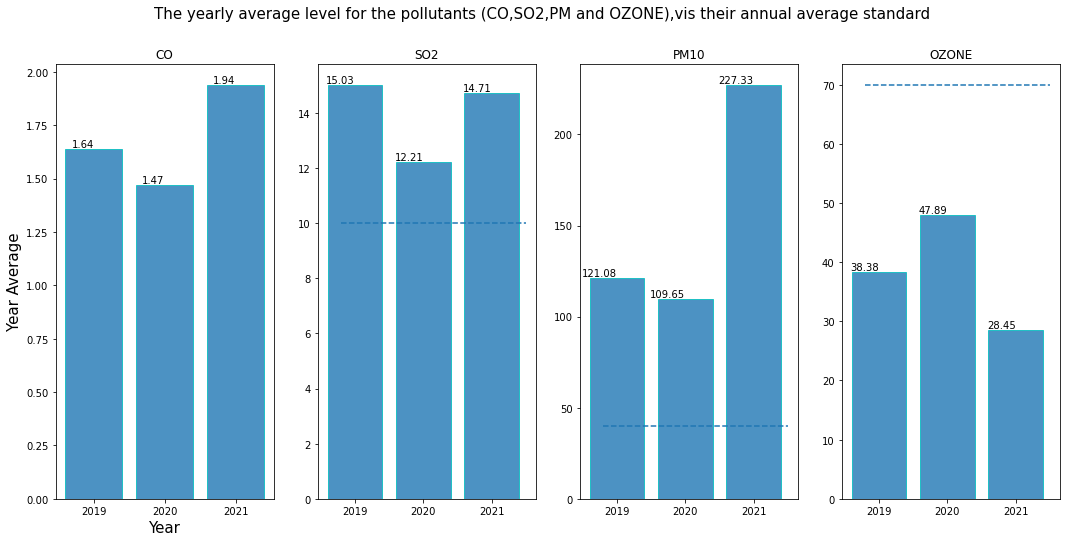

In [30]:
fig,(ax1,ax2,ax3,ax4)=plt.subplots(1,4,figsize=(18,8))
ax4.bar(dfoz.index,dfoz['Yearly average'],width=0.8,alpha=0.8,edgecolor='c')
ax4.hlines(70,-.2,2.5,linestyles="dashed")

for p in ax4.patches:
 ax4.annotate(p.get_height(),(p.get_x()+p.get_width()/2,p.get_height()), 
 color="black", ha="right", va ='bottom',fontsize=10)
ax4.set_title('OZONE')

ax3.bar(dfpm.index,dfpm['Yearly average'],width=0.8,alpha=0.8,edgecolor='c')
ax3.hlines(40,-.2,2.5,linestyles="dashed")

for p in ax3.patches:
 ax3.annotate(p.get_height(),(p.get_x()+p.get_width()/2,p.get_height()), 
 color="black", ha="right", va ='bottom',fontsize=10)
ax3.set_title('PM10')

ax2.bar(dfso.index,dfso['Yearly average'],width=0.8,alpha=0.8,edgecolor='c')
ax2.hlines(10,  -.2,2.5, linestyles="dashed")

for p in ax2.patches:
 ax2.annotate(p.get_height(),(p.get_x()+p.get_width()/2,p.get_height()), 
 color="black", ha="right", va ='bottom',fontsize=10)
ax2.set_title('SO2')

ax1.bar(dfco.index,dfco['Yearly average'],width=0.8,alpha=0.8,edgecolor='c')
#ax1.hlines(50,  -.3,0, linestyles="dashed")
for p in ax1.patches:
 ax1.annotate(p.get_height(),(p.get_x()+p.get_width()/2,p.get_height()), 
 color="black", ha="right", va ='bottom',fontsize=10)
ax1.set_title('CO')
ax1.set_ylabel('Year Average',size=15)
ax1.set_xlabel('Year',size=15)
fig.suptitle('The yearly average level for the pollutants (CO,SO2,PM and OZONE),vis their annual average standard',size=15)


#### Observation: It is evident that standards for annual average are exceeded only for PM10 and OZONE,  
> For SO2,and CO, the observed values are relatively close to the prescribed standard. ,Therefore, for further analysis, 
> only these two pollutants (PM10 and OZONE) are considered.

In [31]:
aq2016['pm10'].min()

60.98

 60>>360 <br>
361>>560 
<br>
561>>760 <br>
761>>974

In [32]:
a2=aq2019[(aq2019['pm10']<=60)]['pm10'].count()

In [33]:
#b2=aq2019[(aq2019['pm10'])>60 & (aq2019['pm10']<=360)]['pm10'].count()
b2=aq2019[((aq2019['pm10']>60) & (aq2019['pm10']<=360))]['pm10'].count()


In [34]:
c2=aq2019[((aq2019['pm10']>360)&(aq2019['pm10']<=560))]['pm10'].count()

In [35]:
d2=aq2019[(aq2019['pm10']>560)&(aq2019['pm10']<=760)]['pm10'].count()

In [36]:
a3=aq2020[(aq2020['pm10']<=60)]['pm10'].count()
b3=aq2020[((aq2020['pm10']>60) & (aq2020['pm10']<=360))]['pm10'].count()
c3=aq2020[((aq2020['pm10']>360)&(aq2020['pm10']<=560))]['pm10'].count()
d3=aq2020[(aq2020['pm10']>560)&(aq2020['pm10']<=760)]['pm10'].count()

In [37]:
a4=aq2021[(aq2021['pm10']<=60)]['pm10'].count()
b4=aq2021[((aq2021['pm10']>60) & (aq2021['pm10']<=360))]['pm10'].count()
c4=aq2021[((aq2021['pm10']>360)&(aq2021['pm10']<=560))]['pm10'].count()
d4=aq2021[(aq2021['pm10']>560)&(aq2021['pm10']<=760)]['pm10'].count()

In [38]:
dfaq2019=pd.DataFrame({'year':'2019','PM levels':['less than 60','between 61 &360','between 361 &560','between 561 &760'],'Nom of days':[a2,b2,c2,d2]})

In [39]:
dfaq2020=pd.DataFrame({'year':'2020','PM levels':['less than 60','between 61 &360','between 361 &560','between 561 &760'],'Nom of days':[a3,b3,c3,d3]})

In [40]:
dfaq2021=pd.DataFrame({'year':'2021','PM levels':['less than 60','between 61 &360','between 361 &560','between 561 &760'],'Nom of days':[a4,b4,c4,d4]})

In [41]:
dfaq2019.set_index('year',inplace=True)
dfaq2020.set_index('year',inplace=True)
dfaq2021.set_index('year',inplace=True)


In [42]:
dfaq2019

,PM levels,Nom of days
year,,
2019,less than 60,5
2019,between 61 &360,409
2019,between 361 &560,89
2019,between 561 &760,21


Text(0.5, 1.0, '2020')

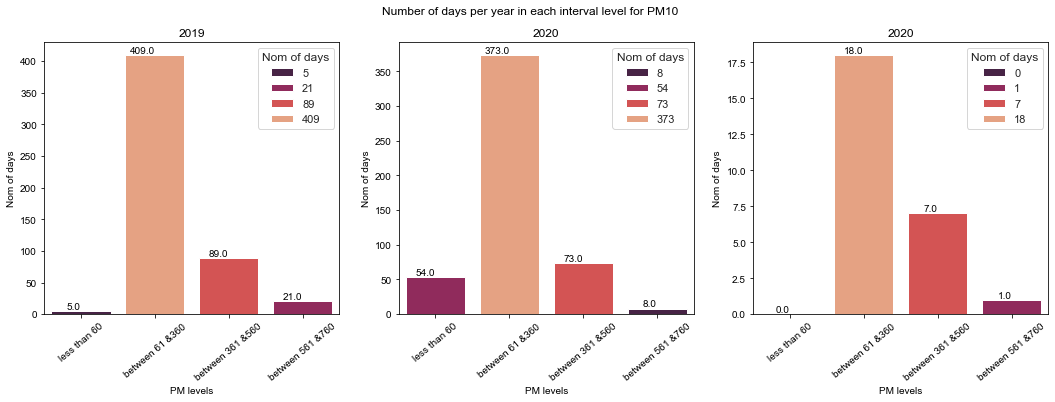

In [43]:
fig2,(ax1,ax2,ax3)=plt.subplots(1,3,figsize=(18, 5))
fig2.suptitle("Number of days per year in each interval level for PM10")
sns.set_theme(style="whitegrid")


ax1=sns.barplot(y='Nom of days',x='PM levels',data=dfaq2019,hue='Nom of days',palette="rocket",ax=ax1,dodge=False)
for p in ax1.patches:
 ax1.annotate(p.get_height(),(p.get_x()+p.get_width()/2,p.get_height()), 
 color="black", ha="right", va ='bottom',fontsize=10)
ax1.set_xticklabels(dfaq2021['PM levels'],rotation=40)
ax1.set_title('2019')

ax2=sns.barplot(y='Nom of days',x='PM levels',data=dfaq2020,hue='Nom of days',palette="rocket",ax=ax2,dodge=False)
for p in ax2.patches:
 ax2.annotate(p.get_height(),(p.get_x()+p.get_width()/2,p.get_height()), 
 color="black", ha="right", va ='bottom',fontsize=10)
ax2.set_xticklabels(dfaq2020['PM levels'],rotation=40)
ax2.set_title('2020')

ax3=sns.barplot(y='Nom of days',x='PM levels',data=dfaq2021,hue='Nom of days',palette="rocket",ax=ax3,dodge=False)
for p in ax3.patches:
 ax3.annotate(p.get_height(),(p.get_x()+p.get_width()/2,p.get_height()), 
 color="black", ha="right", va ='bottom',fontsize=10)
ax3.set_xticklabels(dfaq2021['PM levels'],rotation=40)
ax3.set_title('2020')



## It is seen that PM10 values decreases over years 
> ### start with restrictions on major polluting activities, including basic activates  , could be confined to this category

### SO2 the number of days in each year on which monitored values exceed the 24-hourly standards of 10 μg/m3is plotted

In [44]:
b=aq2020[(aq2020['SO2']>=10)]['SO2'].count()
a=aq2019[(aq2019['SO2']>=10)]['SO2'].count()
c=aq2021[(aq2021['SO2']>=10)]['SO2'].count()

In [45]:
daysofso2=pd.DataFrame({'number of days with SO2>10':[a,b,c]},index=[2019,2020,2021])

In [46]:
daysofso2

,number of days with SO2>10
2019,329
2020,287
2021,21


Text(0.5, 0.98, 'Number of days per year with critical levels of SO2 concentration')

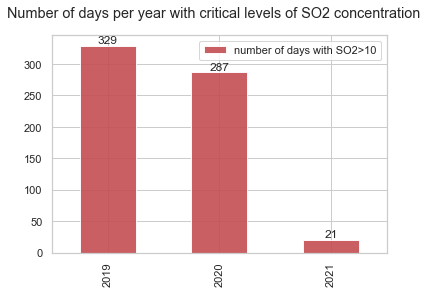

In [68]:
ax=daysofso2.plot(kind='bar',alpha=0.9,color='r')
for p in ax.patches:
 ax.annotate(p.get_height(), (p.get_x() + p.get_width() / 2, p.get_height()), ha = 'center', va = 'bottom')
plt.suptitle('Number of days per year with critical levels of SO2 concentration')

#### OZone the number of days in each year on which monitored values exceed the 24-hourly standards of 30 is plotted

In [60]:
a=aq2019[(aq2019['Ozone']>=40)]['Ozone'].count()
b=aq2020[(aq2020['Ozone']>=40)]['Ozone'].count()
c=aq2021[(aq2021['Ozone']>=40)]['Ozone'].count()

In [61]:
dfnomofozone=pd.DataFrame({'number of days with OZONE>40':[a,b,c]},index=[2019,2020,2021])

In [62]:
dfnomofozone

,number of days with OZONE>40
2019,216
2020,271
2021,5


Text(0.5, 0.98, 'Number of days per year with critical levels of OZone concentration')

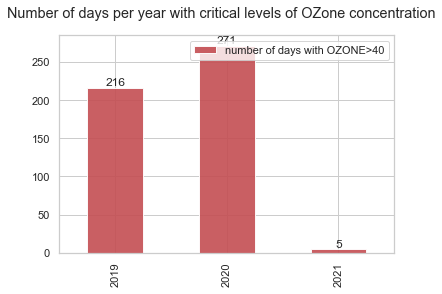

In [66]:
ax=dfnomofozone.plot(kind='bar',alpha=0.9,color='r')
for p in ax.patches:
 ax.annotate(p.get_height(), (p.get_x() + p.get_width() / 2, p.get_height()), ha = 'center', va = 'bottom')
plt.suptitle('Number of days per year with critical levels of OZone concentration')

### Part 3 of air quality analysis: Identifying the months where PM2.5 daily values exceed 
### critical levels on the majority of the days

In [48]:
aq2019['month']=pd.DatetimeIndex(aq2019['from_date']).month
aq2020['month']=pd.DatetimeIndex(aq2020['from_date']).month
aq2021['month']=pd.DatetimeIndex(aq2021['from_date']).month


<ipython-input-48-5cb1071fad55>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aq2019['month']=pd.DatetimeIndex(aq2019['from_date']).month
<ipython-input-48-5cb1071fad55>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aq2020['month']=pd.DatetimeIndex(aq2020['from_date']).month
<ipython-input-48-5cb1071fad55>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://

In [49]:
aq2019['condition']=(aq2019['pm10']>=300)
aq2020['condition']=(aq2020['pm10']>=300)
aq2021['condition']=(aq2021['pm10']>=300)

<ipython-input-49-5f1988542202>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aq2019['condition']=(aq2019['pm10']>=300)
<ipython-input-49-5f1988542202>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aq2020['condition']=(aq2020['pm10']>=300)
<ipython-input-49-5f1988542202>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable

In [50]:
aq2020['condition'].count()


509

### clac all values True and false , replace flase with null to get real num of true values

In [51]:
aq2020['condition'].replace({False:np.nan},inplace=True)
aq2020['condition'].count()


C:\Users\EC\anaconda3\lib\site-packages\pandas\core\series.py:4563: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


138

In [52]:
aq2019['condition'].replace({False:np.nan},inplace=True)
aq2019['condition'].count()


191

In [53]:
aq2021['condition'].replace({False:np.nan},inplace=True)
aq2021['condition'].count()


12

### we get all values bigger than 300 in condition raw
#### let's get all condition by month 

In [54]:
aq2019group=aq2019.groupby('month')['condition'].count()

In [55]:
aq2020group=aq2020.groupby('month')['condition'].count()
aq2021group=aq2021.groupby('month')['condition'].count()

In [56]:
aq2020group

month
1     19
2     21
3      3
4      0
5      0
6      2
7      0
8      0
9      0
10    29
11    32
12    32
Name: condition, dtype: int64

#### let's combine all three groups one dataframe to compare betwen them

In [57]:
collection=pd.concat([aq2019group,aq2020group,aq2021group],axis=1)

In [58]:
collection.columns=(['2019','2020','2021'])
collection.replace({np.nan:0})

,2019,2020,2021
month,,,
1,32,19,12.0
2,8,21,0.0
3,8,3,0.0
4,18,0,0.0
5,24,0,0.0
6,11,2,0.0
7,9,0,0.0
8,0,0,0.0
9,0,0,0.0


<AxesSubplot:xlabel='month'>

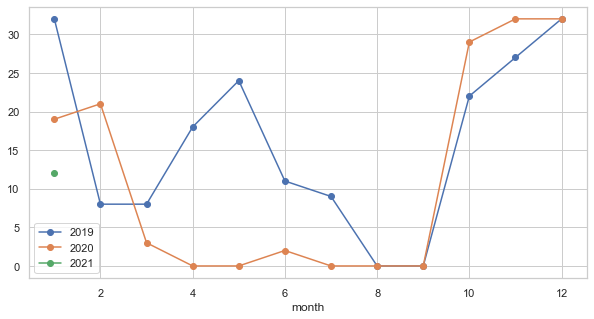

In [59]:
collection.plot(kind='line',figsize=(10,5),marker='o')


### We can observe from this table that month 1 (January), month 11 (November), and 
### month 12 (December), are the most critical months for all three years

Text(0.5, 1.0, 'Number of days with critical levels of PM10 in each month of years 2019-2021')

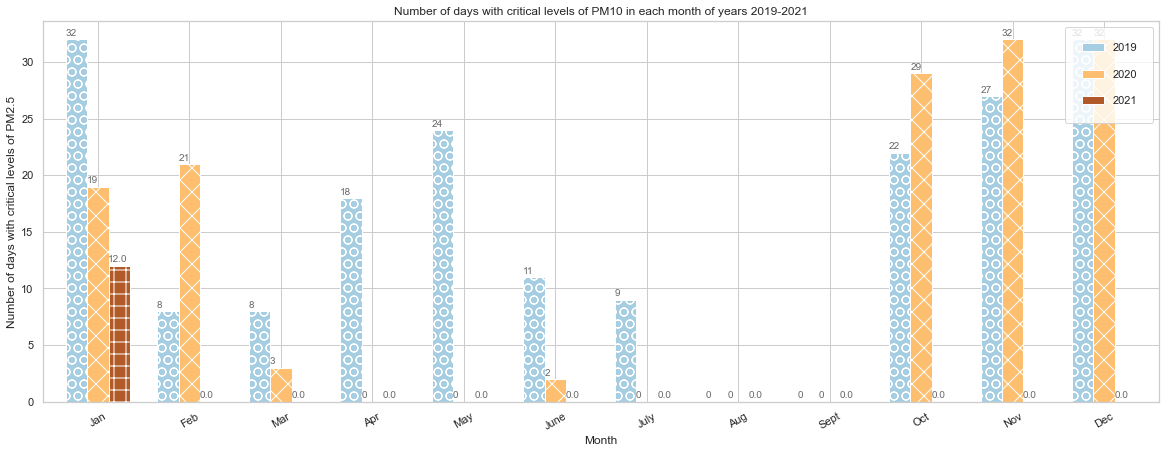

In [109]:
ax=collection.plot(kind='bar',figsize=(20,7),width=0.7,align='center',colormap='Paired')
bars = ax.patches
ax.set_xticklabels(['Jan','Feb','Mar','Apr','May','June','July','Aug','Sept','Oct','Nov','Dec'],rotation=30)
ax.set_xlabel('Month',fontsize=12)
ax.set_ylabel('Number of days with critical levels of PM2.5',fontsize=12)


patterns =('O','x','+')
ax.legend(loc='upper right', borderpad=1.5, labelspacing=1.5)
hatches = [p for p in patterns for i in range(len(collection))]
for bar, hatch in zip(bars, hatches):
 bar.set_hatch(hatch)

for i in ax.patches:
 ax.text(i.get_x()-.003, i.get_height()+.3,round(i.get_height(),2), fontsize=10,color='dimgrey')

ax.set_title("Number of days with critical levels of PM10 in each month of years 2019-2021")